In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, create_scatter_plot

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'Folktables_NY_2018_Employment'
EXPERIMENT_SESSION_UUID = 'e12769fb-57b5-4b99-b5e8-35e8b2f952d1'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['LogisticRegression', 'RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(288, 35)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,...,0.757558,1.000000,0.000000,0.735146,1.000000,0.000000,0.757696,1.000000,0.000000,0.746500
1,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:13:56.437,...,0.757558,1.000000,0.000000,0.738167,1.000000,0.000000,0.755710,1.000000,0.000000,0.747000
2,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,1,OK,2023-07-13 20:09:51.318,...,0.741087,1.000000,0.000000,0.748603,1.000000,0.000000,0.730022,1.000000,0.000000,0.740000
3,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,1,OK,2023-07-13 20:13:56.447,...,0.736996,1.000000,0.000000,0.744879,1.000000,0.000000,0.726782,1.000000,0.000000,0.736500
4,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,2,OK,2023-07-13 20:09:51.332,...,0.743425,1.000000,0.000000,0.765363,1.000000,0.000000,0.725702,1.000000,0.000000,0.747000
5,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,2,OK,2023-07-13 20:13:56.459,...,0.741672,1.000000,0.000000,0.763501,1.000000,0.000000,0.722462,1.000000,0.000000,0.744500
6,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.343,...,0.746932,1.000000,0.000000,0.736499,1.000000,0.000000,0.750540,1.000000,0.000000,0.743000
7,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:13:56.471,...,0.745763,1.000000,0.000000,0.737430,1.000000,0.000000,0.746220,1.000000,0.000000,0.741500
32,Aleatoric_Uncertainty,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,...,0.726883,0.688841,0.845754,0.741677,0.700699,0.855416,0.722172,0.684445,0.840147,0.731856
33,Aleatoric_Uncertainty,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:13:56.437,...,0.726227,0.688007,0.845653,0.740513,0.700429,0.853521,0.721825,0.683224,0.841237,0.731104


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
15,Accuracy,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.744009,1.000000,0.000000,0.748603,1.000000,0.000000,0.739741,1.000000,0.000000,0.744500
47,Aleatoric_Uncertainty,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.593534,0.553246,0.710624,0.609282,0.578100,0.702134,0.579841,0.535013,0.707256,0.595651
79,F1,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.787172,1.000000,0.000000,0.796380,1.000000,0.000000,0.780710,1.000000,0.000000,0.789278
111,FNR,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.187563,0.000000,1.000000,0.176287,0.000000,1.000000,0.192090,0.000000,1.000000,0.183447
143,FPR,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.351541,0.000000,1.000000,0.362587,0.000000,1.000000,0.351899,0.000000,1.000000,0.357488
175,IQR,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.156973,0.144850,0.192204,0.160691,0.150226,0.191855,0.154161,0.141376,0.190502,0.157668
207,Jitter,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.142998,0.116319,0.220537,0.150160,0.129712,0.211051,0.137761,0.107731,0.223115,0.144419
239,Label_Stability,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.794600,0.834313,0.679178,0.783613,0.813682,0.694074,0.803067,0.848759,0.673195,0.792620
271,Mean,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.421089,0.408405,0.457953,0.410101,0.397988,0.446170,0.428417,0.417558,0.459282,0.418581
303,Overall_Uncertainty,100,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.387,...,0.668455,0.623172,0.800064,0.684995,0.649398,0.790993,0.654488,0.604701,0.795998,0.670870


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][3].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.015803,-0.008265,0.027563,RandomForestClassifier,Exp_iter_1,0.0,3
1,Equalized_Odds_FPR,0.010688,-0.053515,0.043196,RandomForestClassifier,Exp_iter_1,0.0,3
2,Equalized_Odds_FNR,-0.015803,0.008265,-0.027563,RandomForestClassifier,Exp_iter_1,0.0,3
3,Disparate_Impact,0.999030,0.951572,1.030963,RandomForestClassifier,Exp_iter_1,0.0,3
4,Statistical_Parity_Difference,-0.001037,-0.052474,0.032950,RandomForestClassifier,Exp_iter_1,0.0,3
5,Accuracy_Parity,0.008863,0.018279,0.003395,RandomForestClassifier,Exp_iter_1,0.0,3
6,Label_Stability_Ratio,0.975775,0.985491,0.982759,RandomForestClassifier,Exp_iter_1,0.0,3
7,IQR_Parity,0.006530,0.009988,0.004813,RandomForestClassifier,Exp_iter_1,0.0,3
8,Std_Parity,0.003872,0.004885,0.003331,RandomForestClassifier,Exp_iter_1,0.0,3
9,Std_Ratio,1.035240,1.044163,1.029882,RandomForestClassifier,Exp_iter_1,0.0,3


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.5][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.034023,-0.005409,-0.044470,RandomForestClassifier,Exp_iter_1,0.5,0
1,Equalized_Odds_FPR,0.009326,0.069253,0.085112,RandomForestClassifier,Exp_iter_1,0.5,0
2,Equalized_Odds_FNR,0.034023,0.005409,0.044470,RandomForestClassifier,Exp_iter_1,0.5,0
3,Disparate_Impact,0.991292,1.038035,1.021353,RandomForestClassifier,Exp_iter_1,0.5,0
4,Statistical_Parity_Difference,-0.009286,0.039962,0.022605,RandomForestClassifier,Exp_iter_1,0.5,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

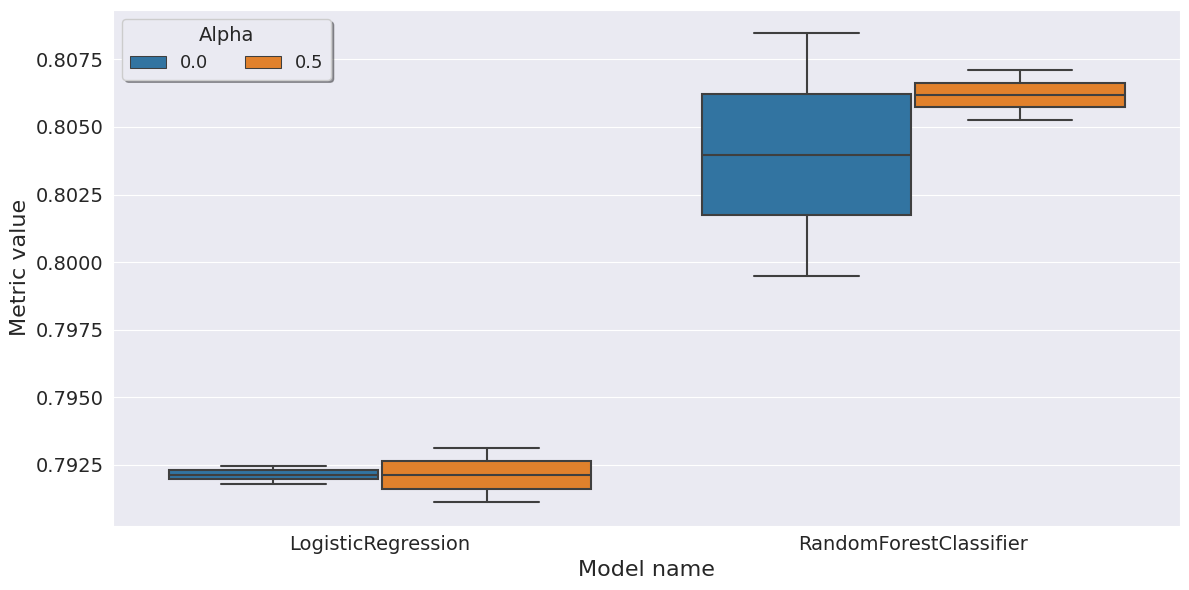

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct, metric_name='F1')

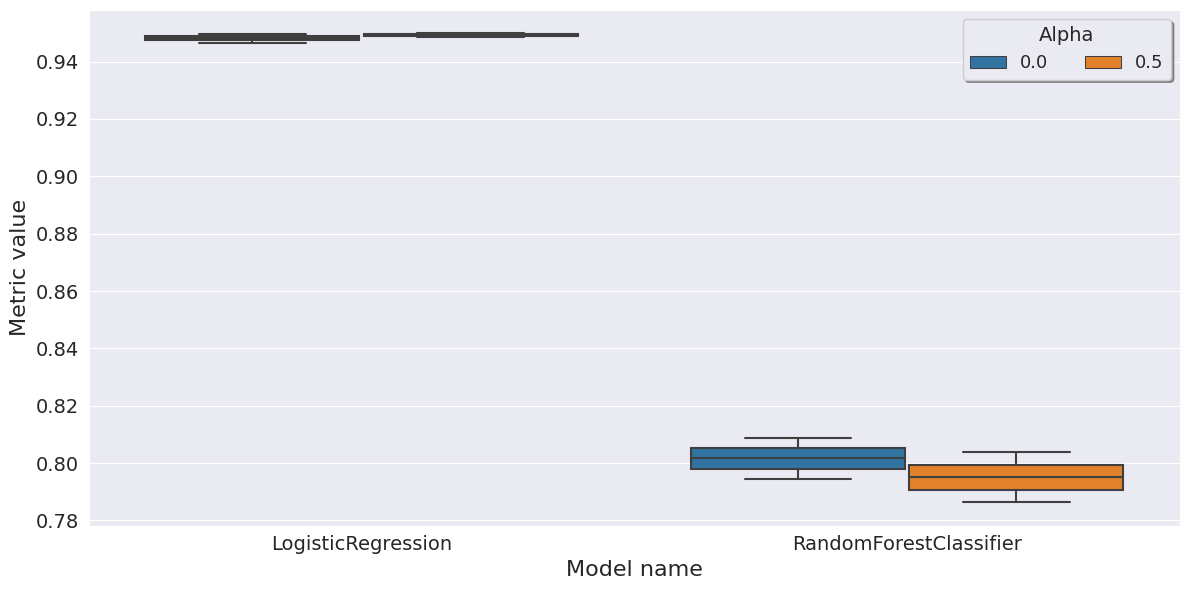

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                           legend_location='upper right')

## Figure 2. Create group boxplots.

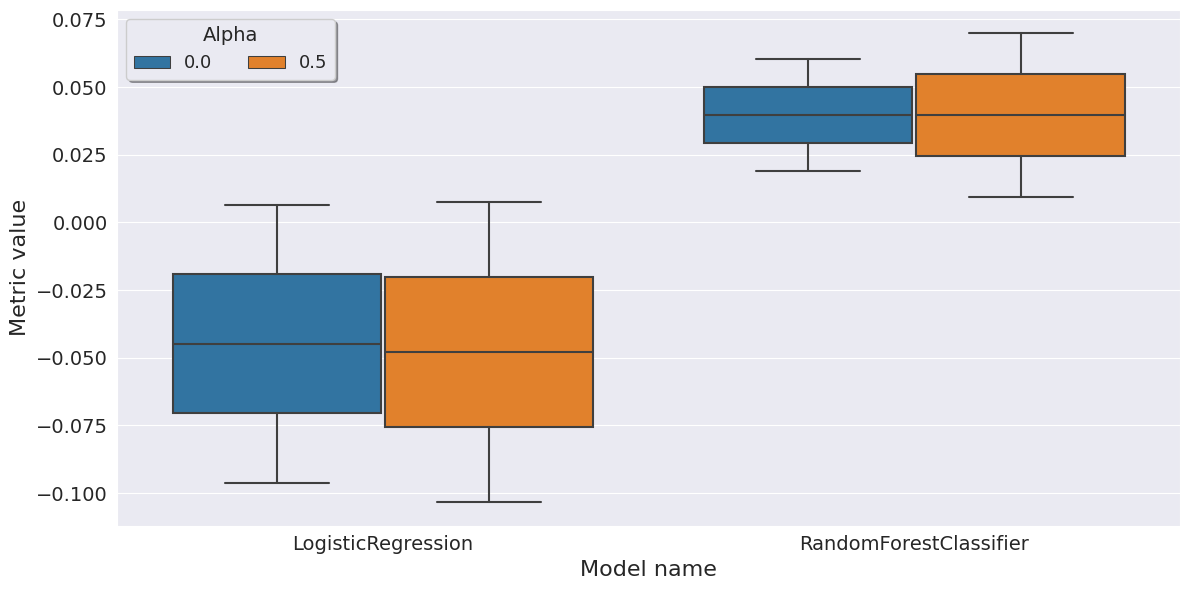

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='SEX')

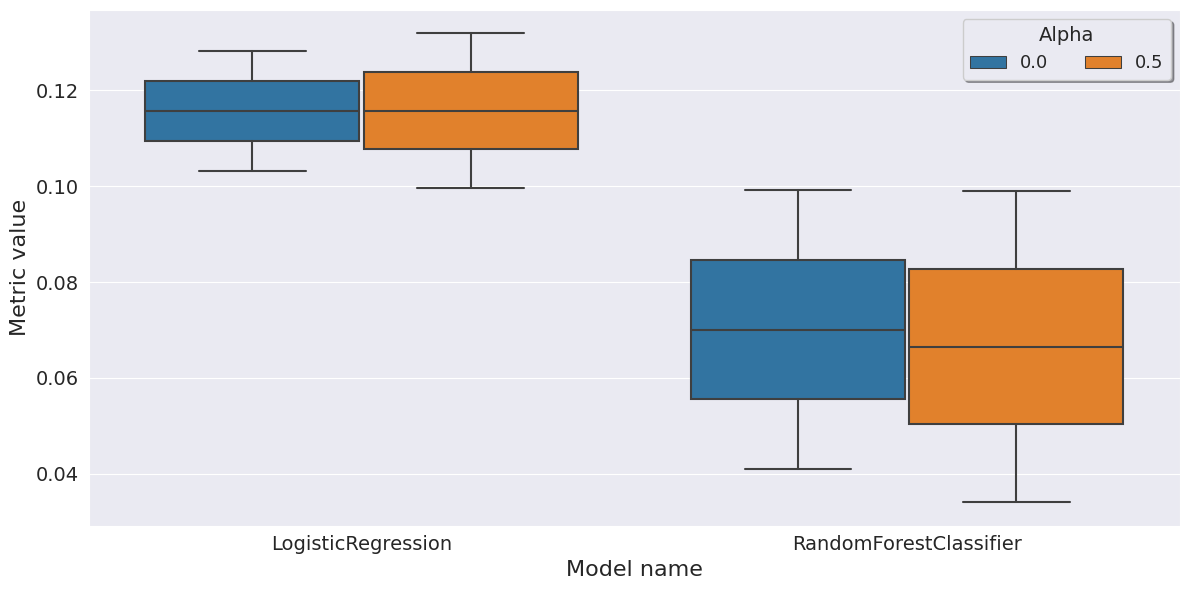

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                           legend_location='upper right')

## Figure 5. Out-of-domain boxplots.

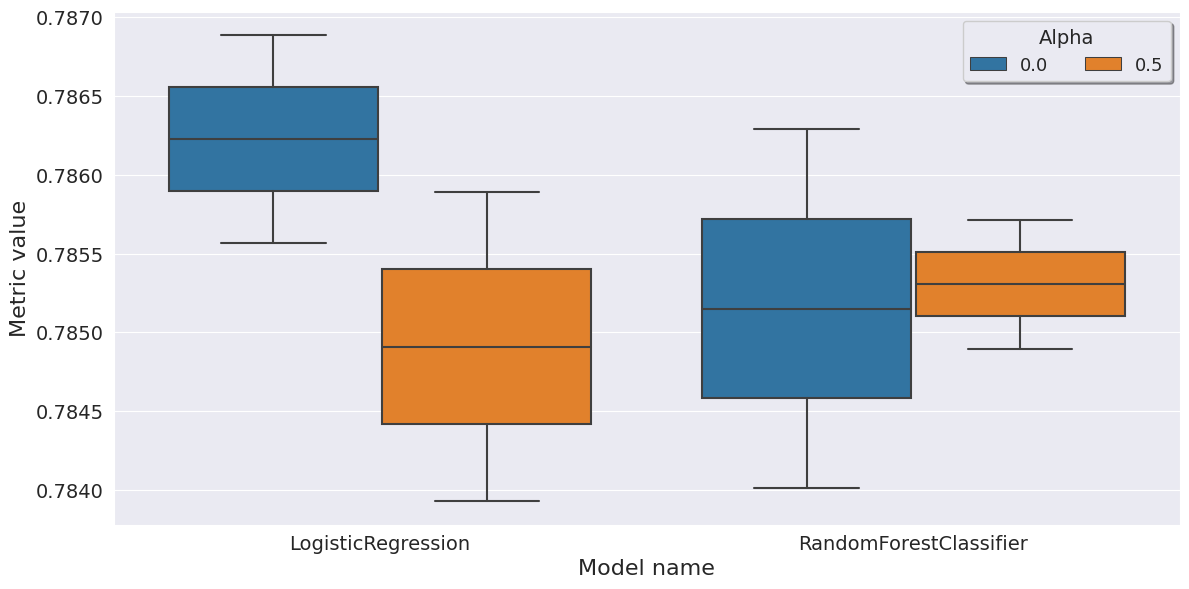

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_name='F1',
                                           legend_location='upper right', test_set_index=1)

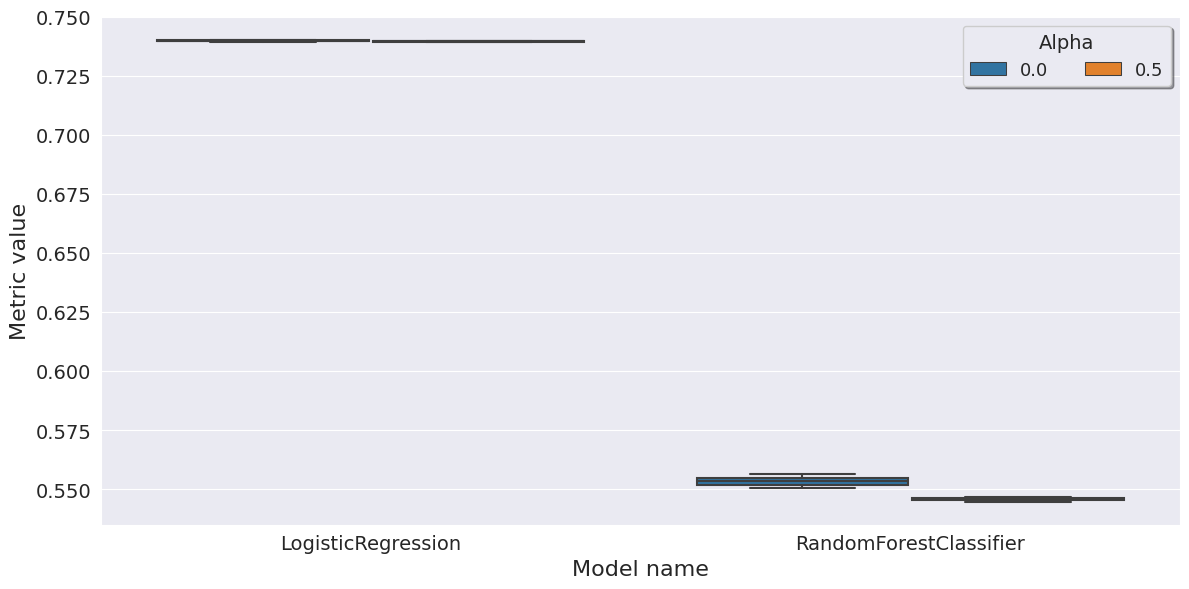

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_name='Aleatoric_Uncertainty',
                                           legend_location='upper right', test_set_index=1)

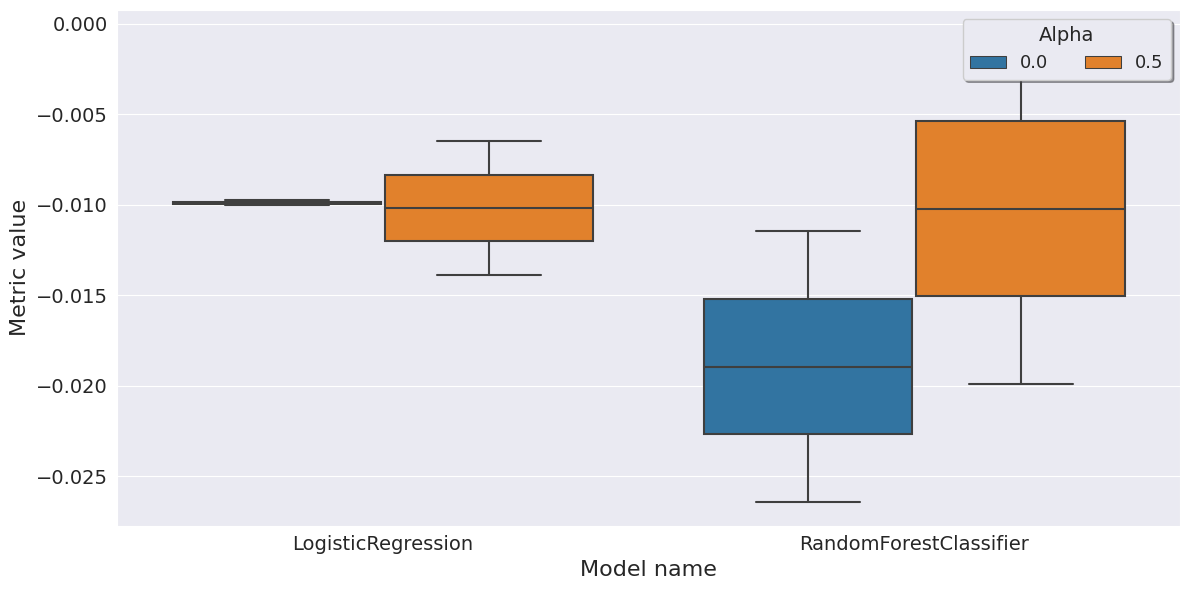

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                           legend_location='upper right', test_set_index=1)

## Figure 3. Scatter plots.

In [23]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio',
                    alpha=0.0)

alt.Chart(...)

In [24]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='SEX&RAC1P',
                    fairness_metric_name='Equalized_Odds_FPR',
                    stability_metric_name='Label_Stability_Ratio',
                    alpha=0.5)

alt.Chart(...)

In [25]:
create_scatter_plot(melted_all_group_metrics_per_model_dct,
                    group='RAC1P',
                    fairness_metric_name='Equalized_Odds_FNR',
                    stability_metric_name='Label_Stability_Ratio',
                    alpha=0.0)

alt.Chart(...)